<a href="https://colab.research.google.com/github/sasan-osmannezhad/test/blob/main/tf_single_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import tensorflow as tf



In [ ]:
## Generate Random data with Numpy

In [2]:
observation = 1000
x = np.random.uniform(-10,10,size = (observation,1))
z = np.random.uniform(-10,10,size = (observation,1))

inputs_np = np.column_stack((x,z))

In [3]:
print(inputs_np.shape)

print(x.ndim)

print(x.shape)

print(z.shape)

print(type(inputs_np))
print(type(z))

(1000, 2)
2
(1000, 1)
(1000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Supervised learning algoritms need targets ,

our target can be:

target = 2x +5 z + 20 + noise

In [4]:
noise = np.random.uniform(-.01 , .01 , size= (observation,1))

print(noise.shape)

print(noise.ndim)

target_np = 2*x - 5*z + 20 + noise

(1000, 1)
2



Let's plot our made up data with numpy

## creat npz data format for tensorflow

In [5]:
np.savez("tf_data", inputs  = inputs_np , targets = target_np )

**getin some information from npz files b flowing codes**

In [8]:
training_data = np.load("tf_data.npz")

for key in training_data:
    print(key, training_data[key].shape)


inputs (1000, 2)
targets (1000, 1)


In [ ]:
print(training_data.files)

['inputs', 'targets']


## making tensorflow model

In [ ]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,

                                                  #kernel_initializer = tf.random_uniform_initializer(minval=-.01,maxval=.01),
                                                  #bias_initializer = tf.random_uniform_initializer(minval=-.001, maxval=.001)
                                                  )
                            ])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=.001)
model.compile(optimizer=custom_optimizer,loss="mean_squared_error")
model.fit(training_data["inputs"], training_data["targets"], epochs=100 , verbose=2 )

In [54]:
model.layers[0].get_weights()
#target_np = 2*x - 5*z + 20 + noise

[array([[ 2.0000737],
        [-5.00001  ]], dtype=float32),
 array([19.999966], dtype=float32)]

In [55]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0000737],
       [-5.00001  ]], dtype=float32)

In [56]:
biases = model.layers[0].get_weights()[1]
biases

array([19.999966], dtype=float32)

In [57]:
predictions = model.predict_on_batch(training_data["inputs"])

predictions.shape

(1000, 1)

In [58]:
training = training_data["targets"]
training.shape

(1000, 1)

## we want to stack to numpy type data fram together then make pandas data frame

In [61]:
np_data_fram = np.column_stack((predictions,training))
pd_data_frame = pd.DataFrame(np_data_fram,columns=["predictions","training"])
pd_data_frame

,predictions,training
0,40.130917,40.125290
1,0.681629,0.676809
2,41.260559,41.261995
3,15.316306,15.317695
4,45.200268,45.206033
...,...,...
995,32.875248,32.884714
996,-1.189932,-1.192853
997,47.129536,47.121309
998,-24.266533,-24.273095


<function matplotlib.pyplot.show(close=None, block=None)>

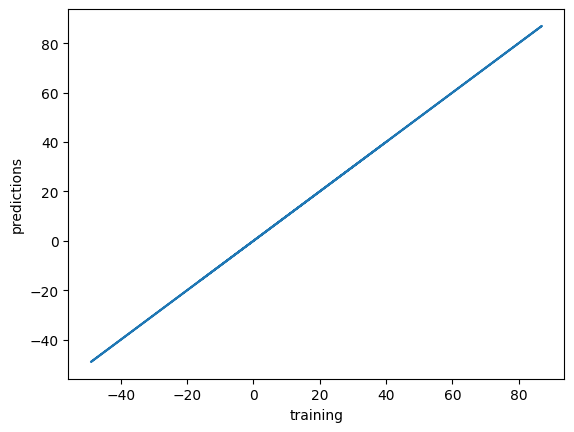

In [64]:
plt.plot(training,predictions)
plt.xlabel("training")
plt.ylabel("predictions")
plt.show

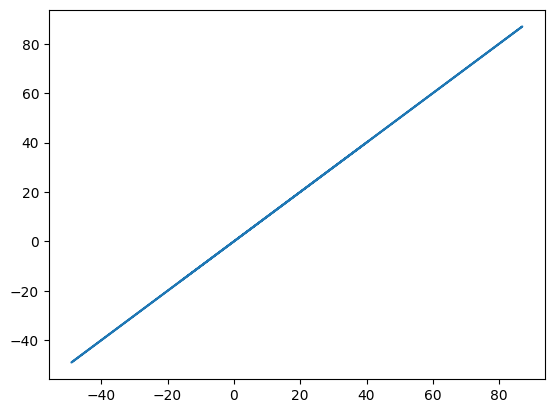

In [65]:
plt.plot(np.squeeze(predictions),np.squeeze(training))

now , set the first varibles

seting laerning rate

trianing data